Computing M-polynomials for cycle graphs...
Completed n=10
Completed n=20
Completed n=30
Completed n=40
Completed n=50
Computed 44 polynomials

First few M-polynomials:
C_7: 7*x**2*y**2
C_8: 8*x**2*y**2
C_9: 9*x**2*y**2
C_10: 10*x**2*y**2
C_11: 11*x**2*y**2

Pattern: For cycle graph C_n, M-polynomial = n*x^2*y^2
This is because every edge connects two vertices of degree 2


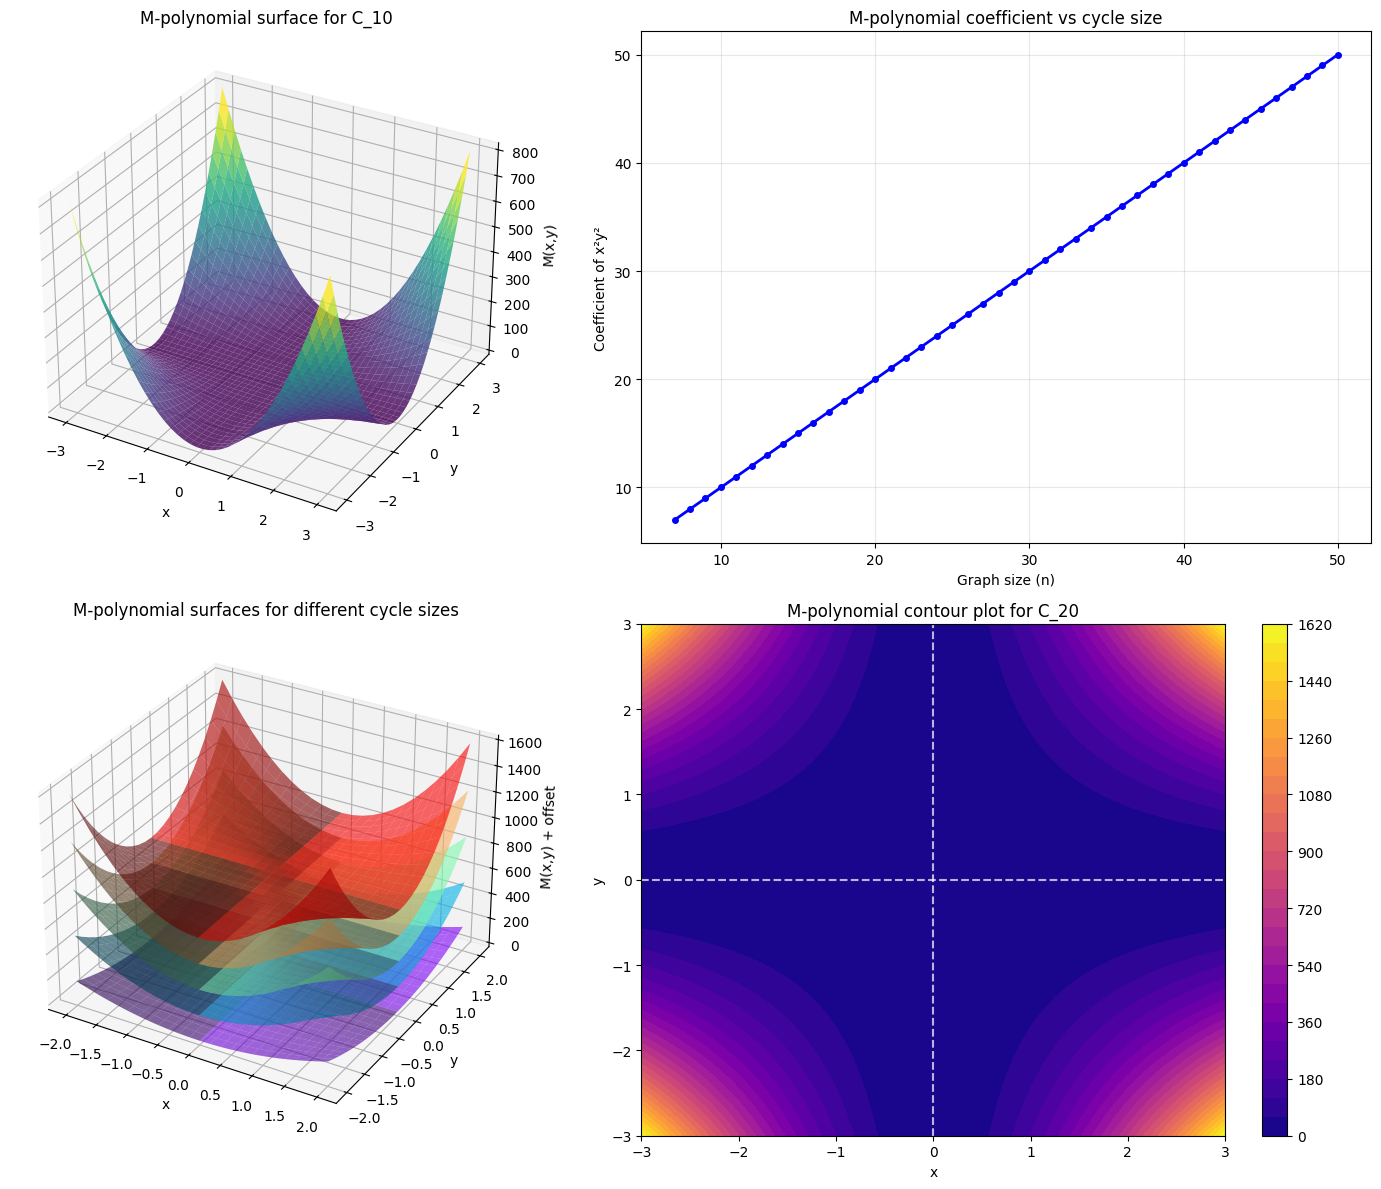


DataFrame with polynomial data:
    n    polynomial  coefficient_x2y2
0   7   7*x**2*y**2                 7
1   8   8*x**2*y**2                 8
2   9   9*x**2*y**2                 9
3  10  10*x**2*y**2                10
4  11  11*x**2*y**2                11
5  12  12*x**2*y**2                12
6  13  13*x**2*y**2                13
7  14  14*x**2*y**2                14
8  15  15*x**2*y**2                15
9  16  16*x**2*y**2                16


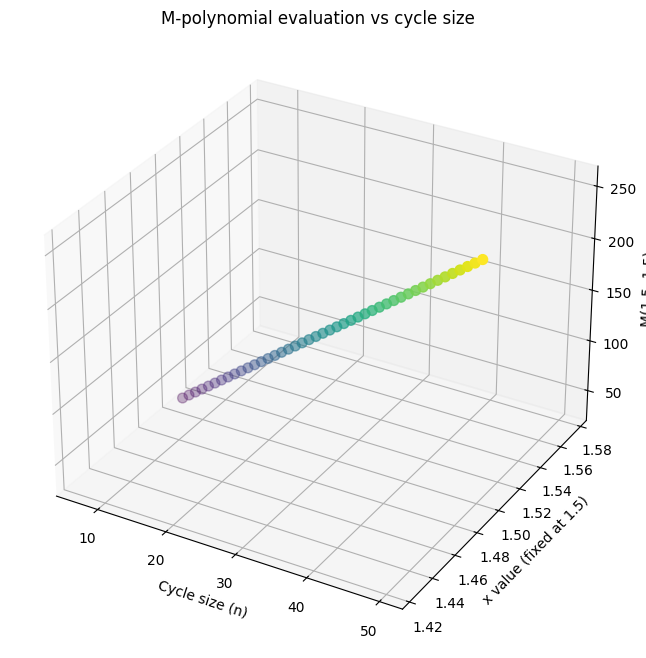


Analysis complete!
Total polynomials computed: 44
For cycle graphs C_n, the M-polynomial is always n*x^2*y^2
This reflects that every edge connects vertices of degree 2


In [12]:
import networkx as nx
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from collections import defaultdict, Counter
import pandas as pd

class GraphPolynomials:
    def __init__(self, G):
        if not isinstance(G, nx.Graph):
            raise TypeError("Graph must be a networkx.Graph")
        self.G = G.copy()
        self.x = sp.Symbol("x")
        self.y = sp.Symbol("y")
    
    def m_polynomial(self):
        """
        Compute the M-polynomial of the graph.
        
        The M-polynomial is defined as M(G; x, y) = Σ m_{i,j} x^i y^j
        where m_{i,j} is the number of edges connecting vertices of degrees i and j.
        """
        x, y = self.x, self.y
        G = self.G
        
        if G.number_of_edges() == 0:
            return sp.Integer(0)
        
        degree_pairs = defaultdict(int)
        
        for u, v in G.edges():
            du, dv = G.degree[u], G.degree[v]
            i, j = sorted((du, dv))  # ensure i ≤ j
            degree_pairs[(i, j)] += 1
        
        poly = sum(k * x**i * y**j for (i, j), k in degree_pairs.items())
        return sp.simplify(poly)

# Compute M-polynomials for cycle graphs n=7 to 50
print("Computing M-polynomials for cycle graphs...")
m_polys = []

for n in range(7, 51):  # n from 7 to 50
    G = nx.cycle_graph(n)
    gp = GraphPolynomials(G)
    poly = gp.m_polynomial()
    m_polys.append((n, poly))
    if n % 10 == 0:
        print(f"Completed n={n}")

print(f"Computed {len(m_polys)} polynomials")

# Display first few polynomials
print("\nFirst few M-polynomials:")
for i in range(min(5, len(m_polys))):
    n, poly = m_polys[i]
    print(f"C_{n}: {poly}")

# For cycle graphs, all vertices have degree 2, so M-polynomial is simple
print(f"\nPattern: For cycle graph C_n, M-polynomial = n*x^2*y^2")
print("This is because every edge connects two vertices of degree 2")

# Prepare data for 3D visualization
def evaluate_polynomial_on_grid(poly, x_vals, y_vals):
    """Evaluate polynomial on a grid of x,y values"""
    x, y = sp.Symbol("x"), sp.Symbol("y")
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.zeros_like(X)
    
    # Convert sympy polynomial to numpy function
    f = sp.lambdify((x, y), poly, 'numpy')
    Z = f(X, Y)
    
    return X, Y, Z

# Create 3D visualization
fig = plt.figure(figsize=(15, 12))

# Plot 1: Surface plot for a specific polynomial
ax1 = fig.add_subplot(221, projection='3d')
n_example = 10  # Choose C_10 as example
example_poly = next(poly for n, poly in m_polys if n == n_example)

x_vals = np.linspace(-3, 3, 40)
y_vals = np.linspace(-3, 3, 40)
X, Y, Z = evaluate_polynomial_on_grid(example_poly, x_vals, y_vals)

surf1 = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('M(x,y)')
ax1.set_title(f'M-polynomial surface for C_{n_example}')

# Plot 2: Polynomial coefficients vs n
ax2 = fig.add_subplot(222)
n_values = [n for n, _ in m_polys]
# For cycle graphs, coefficient of x^2*y^2 equals n
coefficients = n_values  # Since M(C_n) = n*x^2*y^2

ax2.plot(n_values, coefficients, 'bo-', linewidth=2, markersize=4)
ax2.set_xlabel('Graph size (n)')
ax2.set_ylabel('Coefficient of x²y²')
ax2.set_title('M-polynomial coefficient vs cycle size')
ax2.grid(True, alpha=0.3)

# Plot 3: Multiple surface plots for different n values
ax3 = fig.add_subplot(223, projection='3d')
colors = plt.cm.rainbow(np.linspace(0, 1, 5))

for i, n_val in enumerate([10, 20, 30, 40, 50]):
    poly = next(poly for n, poly in m_polys if n == n_val)
    x_vals_small = np.linspace(-2, 2, 25)
    y_vals_small = np.linspace(-2, 2, 25)
    X, Y, Z = evaluate_polynomial_on_grid(poly, x_vals_small, y_vals_small)
    
    # Offset each surface slightly for visibility
    ax3.plot_surface(X, Y, Z + i*200, alpha=0.6, color=colors[i], 
                    label=f'C_{n_val}')

ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('M(x,y) + offset')
ax3.set_title('M-polynomial surfaces for different cycle sizes')

# Plot 4: Heatmap of polynomial values
ax4 = fig.add_subplot(224)
n_example = 20
example_poly = next(poly for n, poly in m_polys if n == n_example)
x_vals = np.linspace(-3, 3, 60)
y_vals = np.linspace(-3, 3, 60)
X, Y, Z = evaluate_polynomial_on_grid(example_poly, x_vals, y_vals)

im = ax4.contourf(X, Y, Z, levels=30, cmap='plasma')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_title(f'M-polynomial contour plot for C_{n_example}')
ax4.axhline(y=0, color='white', linestyle='--', alpha=0.7)
ax4.axvline(x=0, color='white', linestyle='--', alpha=0.7)
plt.colorbar(im, ax=ax4)

plt.tight_layout()
plt.show()

# Save polynomial data
polynomial_data = []
for n, poly in m_polys:
    polynomial_data.append({
        'n': n,
        'polynomial': str(poly),
        'coefficient_x2y2': n  # For cycle graphs
    })

df = pd.DataFrame(polynomial_data)
print("\nDataFrame with polynomial data:")
print(df.head(10))

# Alternative: Interactive 3D plot with specific values
def create_interactive_3d_plot():
    """Create an interactive 3D plot showing how polynomial changes with n"""
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create data points: (n, x_val, polynomial_value)
    n_vals = []
    x_vals = []
    poly_vals = []
    
    x_fixed = 1.5  # Fix x value
    y_fixed = 1.5  # Fix y value
    
    for n, poly in m_polys:
        # Evaluate polynomial at fixed x,y point
        val = poly.subs([(sp.Symbol("x"), x_fixed), (sp.Symbol("y"), y_fixed)])
        n_vals.append(n)
        x_vals.append(float(val))
        poly_vals.append(n)  # This is the coefficient for cycle graphs
    
    # Create 3D scatter plot
    ax.scatter(n_vals, [x_fixed]*len(n_vals), x_vals, c=poly_vals, 
              cmap='viridis', s=50)
    
    ax.set_xlabel('Cycle size (n)')
    ax.set_ylabel(f'x value (fixed at {x_fixed})')
    ax.set_zlabel(f'M({x_fixed}, {y_fixed})')
    ax.set_title('M-polynomial evaluation vs cycle size')
    
    plt.show()

create_interactive_3d_plot()

print("\nAnalysis complete!")
print(f"Total polynomials computed: {len(m_polys)}")
print("For cycle graphs C_n, the M-polynomial is always n*x^2*y^2")
print("This reflects that every edge connects vertices of degree 2")